# Analysis on the Research Interests of LSE Academic Staff

**Ethan Virtudazo e.j.virtudazo@lse.ac.uk**

**Talya Bener t.bener@lse.ac.uk**

## Table of Contents  

### 1. Introduction   
- 1.1 Our Motivation  
- 1.2 Research Questions    
- 1.3 Data Description  
### 2. Data Acquisition   
- 2.1 Web Scraping
### 3. Data Preparation   
- 3.1 Merging the datasets 
- 3.2 Text Data Standardization
- 3.3 Final Dataframe¶
### 4. Data Analysis    
- 4.1 Exploratory Data Analysis (EDA)
- 4.2 Research Questions 
     - RQ1
     - RQ2
     - RQ3
     - RQ4
### 5. Conclusion & Final Remarks   
- 5.1 Summary of Findings   
- 5.2 Limitations & Future Opportunities

# 1. Introduction

## Our Motivation
As undergraduate students in LSE who are taking modules across multiples departments like Statistics, Mathematics, Economics, Finance and the Data Science Institute, we observed that many topics in different modules intersect. This inspired us to think about how different departments in LSE can integrate their knowledges and interest by collaborating on research. Our goal is to encourage academic staff to use an interdiciplinary approach in their research, which would let them use a variety of methods and perspectives to gain a more comprehensive insight on complex problems. 

To be able to quantify this, we chose some variables to be able to analyse the problem in a standardised and comparable basis. Going through LSE's website, we noticed that for each department, every professor has their own webpage. We picked eight departments, which we thought are more similar in terms of their subjects, and then scraped the chosen variables to put them in a dataframe and conduct our analysis.

#### Deviation from original research objective
- We collected many variables as our objective was initially to provide a descriptive overview and background of the academic staff at the LSE but our research focus shifted to identifying potential areas of interdisciplinary research so the final analysis primarily uses the text data in the 'Key Expertise' variable.


## Research Questions 
The main aim of the project is to create recommendations to the LSE academic staff for potential research collaborations. 

**Q1: Which departments have the highest potential for collaboration?**
- Based on the number of topics shared between them. 
- Based on the number of academic staff  that share those interests. 

**Q2: Which academic staff have the highest potential for interdisciplinary collaboration?**
- Finding the pairs with the higest occurences.

**Q3: Which topics have the most diverse backgrounds of professors interested in it?**
- Count the most popular topics with the most number of unique departments interested in it.

**Q4: Popular Topics**
- Which topics are the most popular across all department (top 10)
- Which topics are the most popular within each department (top 5)


## Data Description
From the [LSE Departments and Institutes website](https://info.lse.ac.uk/staff/departments-and-institutes) website, we chose the following departments to work with:
- Statistics
- Mathematics
- Finance
- Accounting
- Management
- Economics
- Data Science Institute
- Methodology

The data used in our project is directly taken from the websites in the form https://www.lse.ac.uk/{department}/people/{professor_name}, where the department and professor name differ for each case.

# 2. Data Acquisition
The data collection program which was done via **web-scraping** can be found in the "/notebooks/Data_Acquisition.ipynb" directory but we will cover the basic concepts and techniques utilized in this notebook.

## 2.1 Web Scraping

For the first four departments in the list above (Statistics, Mathematics, Finance, and Accounting), we used the **Selenium** library to automate web browsers to do the following:

- **disclaimer:** The selenium code may not run depending on the version of the browser on a machine, the project can still be replicated solely in the Data_Analysis.ipynb notebook because the finalized dataset is in the repository, however 

From the [LSE Departments and Institutes website](https://info.lse.ac.uk/staff/departments-and-institutes) website, the department is clicked and then the "People" section is opened, leading to the page with the url https://www.lse.ac.uk/{department_name}/People. After that, the dropdown menu button called "Academic Faculty" (or another wording of it) is clicked and then all the academic staff' website links taken from the link-texts are stored in a list.

- For the last four departments short-cut method is followed using only **Beautiful Soup**:

From the webpage https://www.lse.ac.uk/{department_name}/People, the div of the "Academic Faculty" section is found and again the urls for each professors' website is put in a list.

- The following steps for all departments uses the library **Beautiful Soup**:

Finally all the links in that list are clicked one-by-one in a loop and the following variables are scraped:

- professor names
- professor titles / prefixes
- languages they speak
- modules they are teaching
- key expertise

The data scraped are first put in Python dictionaries and then converted to Pandas DataFrames. Finally the dataframe is turned to seperate **csv files** and stored in the "data" file in the "ST115_Project" folder.

## 2.2 Example and Obstacle

As an example, for the Data Science Institute, 

In [ ]:
# Do not run; just for showing the snippet of the code.
my_link = "https://www.lse.ac.uk/DSI/People"
response_html = requests.get(my_link)

soup = BeautifulSoup(response_html.text)

**A primary obstacle that our project faced with the data acquisition was the lack of standardization of staff pages across the departments which required the use of different approaches for each department. Additionally, even within the same department,different profiles had different html structures so we needed to adapt the code accordingly.**

#### Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os # might need to based on the GitHub repo
import numpy as np
import seaborn as sns
import re

from itertools import combinations

# 3. Data Preparation
- There is a Python notebook called Data_Preparation.ipynb in the repository that handles this part of the data preparation process. We will only cover the basics and the summary of what we did in this current notebook.

### 3.1 Merging
- Our data acquisition process was delegated between the team so naturally, the data needed to be consolidated and cleaned accordingly. After the individual files from the respective departments were collected, we used Data_Preparation.ipynb to combine all of the .csv files into a dataframe to manipulate it.
- Here is a snippet of the code that we used (commented out df so this chunk will not load)

In [ ]:
#df = pd.DataFrame()
#path = '../data'
lengths = []

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        if filename == 'merged.csv': # this is to make sure we are only merging the individual department files
            continue
        temp_df = pd.read_csv(os.path.join('../data', filename))
        if 'Name' in temp_df.columns:
            temp_df = temp_df.rename(columns={'Name': 'Professor Name'})
        lengths.append(len(temp_df))    
        temp_df['department'] = filename.split(".csv")[0]
        df = pd.concat([df, temp_df])
        
df.shape

### 3.2 Text Data Standardization

- After the files had been imported and compiled, a function was created to clean the text data which was stored as an entire string that was technically multiple unique fields. The function was applied to the entire dataset to finally clean all of the text entries in a standardized manner.

In [ ]:
def remove_square_brackets(x):
    """
    This function removes the square brackets in a string.

    """
    if not isinstance(x, float):
        return x.strip("[").strip("]").replace("'", "")
    else:
        return x

### 3.3 Final Dataframe
- The final dataset (merged.csv) is uploaded to the repository and is the product of scraping, merging and cleaning the data.

In [107]:
merged_df = pd.read_csv(os.path.join('../data', "merged.csv"))
merged_df.head()

,Unnamed: 0,Professor Name,Professor Prefix,Key Expertise,Languages,Title,Modules,department
0,0,Dr Ashwini Agrawal,Dr,"corporate finance, corporate governance, labor...",English,Associate Professor of Finance,"FM304 Applied Corporate Finance, FM414 Corpora...",finance
1,1,Ulf Axelson,Professor,"corporate finance, corporate governance, priva...",English,Professor of Finance and Private Equity,"FM410 Private Equity, FM431L Corporate Finance A",finance
2,2,Dr Cynthia Balloch,Dr,"international finance, macroeconomics, corpora...",English,Assistant Professor of Finance,"FM421 Applied Corporate Finance, FM473L Financ...",finance
3,3,Dr Elisabetta Bertero,Dr,sub-sovereign debt; the financial role of the ...,English,Lecturer in Finance,"AC100 Elements of Accounting and Finance, FM10...",finance
4,4,Mike Burkart,Professor,"corporate governance, financial contracting",English,Professor of Finance,"FM436 Financial Economics, FM473M Financial Ma...",finance


In [18]:
key_expertise_dict = {}
key_expertise_list = []

for one_list in merged_df["Key Expertise"]:
    if type(one_list) is not float:
        one_list = re.split('[,;]', one_list)
        for i in one_list:
            key_expertise_list.append(i.strip(" "))             
            
for key_expertise in key_expertise_list:
    if key_expertise != '': # we don't want the empty strings to be counted as an expertise
        if key_expertise not in key_expertise_dict:
            key_expertise_dict[key_expertise] = 1
        else:
            key_expertise_dict[key_expertise] += 1

term_counts_df = pd.DataFrame(key_expertise_dict, index=[0])
shared_term_counts_df = term_counts_df.copy()

for i in term_counts_df:
    if term_counts_df[i][0] == 1:
        shared_term_counts_df = shared_term_counts_df.drop(i, axis=1)
        
shared_term_counts_df.sort_values(by=0, axis=1, ascending=False)        

,macroeconomics,development economics,political economy,accounting,labour economics,corporate finance,industrial organisation,leadership,public economics,applied microeconomics,...,social networks,labour,information economics,theories of industrial structure and their empirical implementation,reflexivity,thematic analysis,comparative party competition,european parliament,electoral systems,probability
0,22,13,11,8,8,7,7,7,6,6,...,2,2,2,2,2,2,2,2,2,2


In [57]:
professors_with_common_interests = {}
merged_df = merged_df.fillna("")

for i in shared_term_counts_df:
    df_containing_interest = merged_df.loc[merged_df["Key Expertise"].str.contains(i)]
    professors_with_common_interests[i] = [df_containing_interest["Professor Name"].to_list(), df_containing_interest["department"].to_list()]

    # how many unique departments per interest
key_interest = professors_with_common_interests.keys()
departments = []
num_professors = []
professor_names = []
dep_count = []

for i in professors_with_common_interests:
    departments.append(set(professors_with_common_interests[i][1]))
    dep_count.append((professors_with_common_interests[i][1]))
    num_professors.append(len(professors_with_common_interests[i][0]))
    professor_names.append(professors_with_common_interests[i][0])                          

common_interest_df = pd.DataFrame(({'Key Interest': key_interest,'Departments': departments, 'Departments Count': dep_count,'Number of Professors': num_professors, 'Professor Names': professor_names})) 
common_interest_df['Departments'] = [list(depts) for depts in common_interest_df['Departments']]
common_interest_df.sort_values("Number of Professors", ascending=False)

,Key Interest,Departments,Departments Count,Number of Professors,Professor Names
6,macroeconomics,"[economics, methodology, finance]","[finance, finance, finance, finance, economics...",24,"[Dr Cynthia Balloch, Dr Christian Julliard, Dr..."
11,econometrics,"[economics, maths, stats, finance]","[finance, finance, finance, stats, economics, ...",16,"[ Vicente Cuñat , Dr Jon Danielsson , Dr Chr..."
56,innovation,"[economics, methodology, finance, management, ...","[finance, finance, finance, economics, economi...",15,"[ Ulf Axelson , Dr Juanita Gonzalez-Uribe , D..."
70,accounting,"[management, accounting, maths]","[accounting, accounting, accounting, accountin...",14,"[Dr Per Ahblom, Alnoor Bhimani, Dr Jose Car..."
53,labour,"[economics, management, finance]","[finance, economics, economics, economics, eco...",14,"[ Vicente Cuñat , Jonathon Hazell, Camille ..."
...,...,...,...,...,...
62,electoral systems,"[data_science_institute, methodology]","[methodology, data_science_institute]",2,"[Professor Kenneth Benoit, Professor Kenneth B..."
63,ethnography,[methodology],"[methodology, methodology]",2,"[Dr Ivan Deschenaux, Dr Eleanor Power]"
64,natural language processing,"[data_science_institute, methodology]","[methodology, data_science_institute]",2,"[Dr Friedrich Geiecke, Dr Jonathan Cardoso-Silva]"
65,comparative politics,[methodology],"[methodology, methodology]",2,"[Dr Anne-Laure Mahe, Dr Ruxandra Serban]"


Here we display the final dataframe (merged_df) that is the consolidation of all of the datasets collected from the acquisition stage after it has been prepared for analysis. 

# 4. Data Analysis
## 4.1 Exploratory Data Analysis (EDA)
- Proportion of missing Values

### How many professors per department

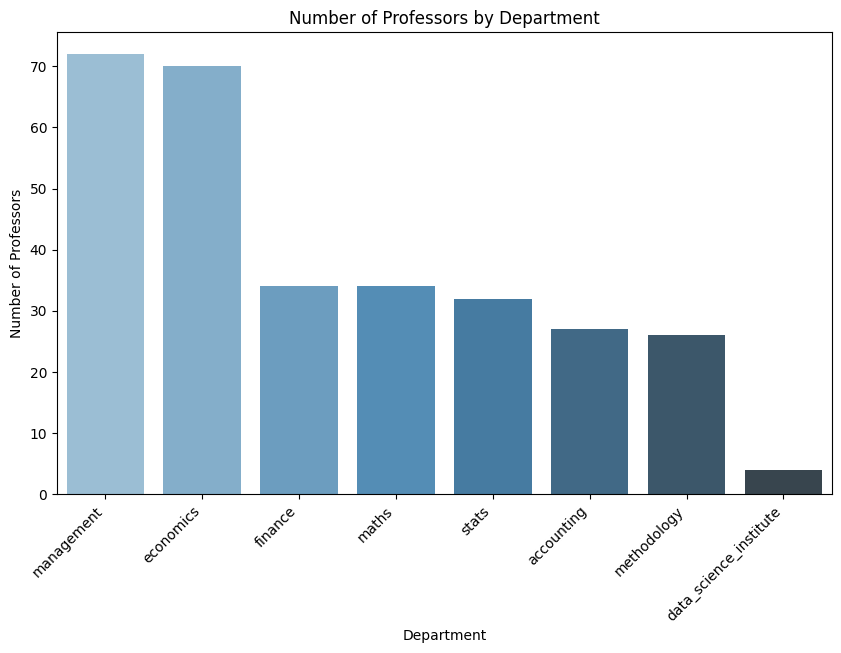

In [121]:
department_counts = merged_df['department'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='Blues_d')
plt.title('Number of Professors by Department')
plt.xlabel('Department')
plt.ylabel('Number of Professors')
plt.xticks(rotation=45, ha='right')
plt.show()

### Missing Values

In [122]:
mask = merged_df['Key Expertise'].isin(['-', np.nan])
subset_df = merged_df[mask].reset_index()
subset_df

,index,Unnamed: 0,Professor Name,Professor Prefix,Key Expertise,Languages,Title,Modules,department
0,6,6,Dr Kim Fe Cram,Dr,NaN,English,Assistant Professor,FM213 Principles of Finance,finance
1,21,21,Dr Cameron Peng,Dr,NaN,English,Assistant Professor of Finance,"FM213 Principles of Finance, FM301 Market Anom...",finance
2,32,32,Dr Linyan Zhu,Dr,NaN,English,Assistant Professor,"FM321 Risk Management and Modelling, FM437 Fin...",finance
3,34,0,Dr James Abdey,Dr,NaN,English,Associate Professorial Lecturer,NaN,stats
4,37,3,Pauline Barrieu,Professor,NaN,English,Professor and Head of Department,NaN,stats
5,38,4,Dr Erik Baurdoux,Dr,NaN,English,Associate Professor,NaN,stats
6,39,5,Wicher Bergsma,Professor,NaN,English,Professor and Deputy Head of Department (Teach...,NaN,stats
7,40,6,Umut Cetin,Professor,NaN,English,Professor,NaN,stats
8,41,7,Dr Yining Chen,Dr,NaN,English,Associate Professor,NaN,stats
9,43,9,Angelos Dassi,Professor,NaN,English,Professor,NaN,stats


Here are the rows which lack the entry for 'Key Expertise'. There are **24** missing values as indicated by the index.

For some deparments such as accounting, management, and finance, the number of professors with missing values for this variable are relatively small so for this report we consider the impact on the final results relatively negligible. However, statistics is missing lots of data so this report might have biased or inaccurate results for the statistics department. However, this department was kept as it is still possible to identify **cross-departmental common research interests**, although the results may suffer from omission.

### Distribution of the number of professors per topic.

<BarContainer object of 15 artists>

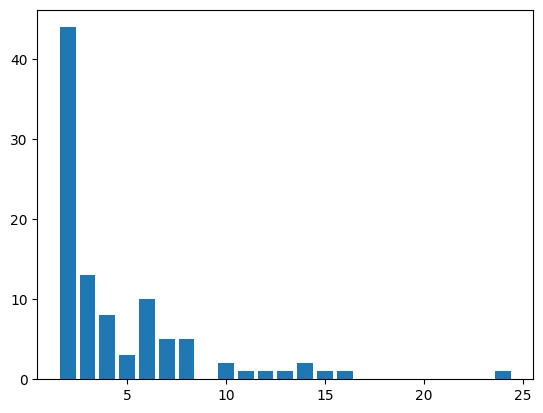

In [123]:
plt.bar(common_interest_df["Number of Professors"].value_counts().index, common_interest_df["Number of Professors"].value_counts().values)

In [124]:
common_interest_df["Number of Professors"].mean()

4.571428571428571

In [131]:
common_interest_df["Number of Professors"].median()

3.0

This plot reveals the distribution of the number of professors for each topic; most research interest/topics (subsetted to ones with at least 2 professors who hold it as a research interest or key expertise) only have 2 professors. There are outliers of 15 and above but these are rare. In other words, most shared research interests are only shared by 2 professors. 
The average number of professors is 4.5 but the median is 3.0.

### Duplicated Professors
- The Data Preparation notebook reveals that Professor Kenneth Bennoit appears twice in the dataset but this is the only professor that was duplicated so our final results and the aggregate conclusions are not affected heavily.

## 4.2 Research Questions

In [21]:
dep_matrix = merged_df 
deps = list(dep_matrix['department'].unique())

**Stacked Bar Graph**

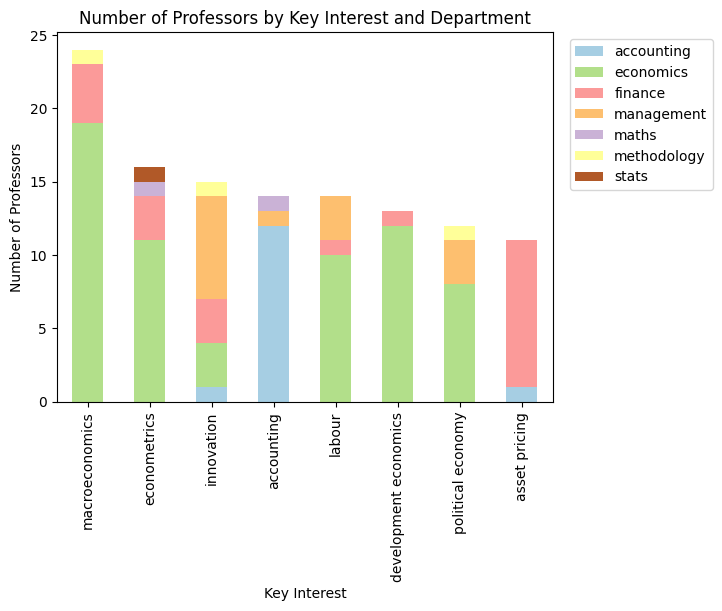

<Figure size 1200x1000 with 0 Axes>

In [22]:
# Subsetting to topics with at least 10 academic staff interested in it.
ten_profs = common_interest_df[common_interest_df["Number of Professors"] > 10]
ten_profs = ten_profs.sort_values(by='Number of Professors', ascending=False).reset_index()
ten_profs

dept_counts = ten_profs['Departments Count'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame(name='Department')

df2 = pd.concat([ten_profs, dept_counts], axis=1).reset_index(drop=True)
df2['Count'] = df2.groupby(["Key Interest", "Department"])["Department"].transform('count')
df2 = df2.applymap(lambda x: tuple(x) if isinstance(x, list) else x)
df2 = df2.drop_duplicates()

df2['Total'] = df2.groupby('Key Interest')['Count'].transform('sum')

df2 = df2.sort_values('Total', ascending=False)

pivoted = df2.pivot(index='Key Interest', columns='Department', values='Count')

total_counts = pivoted.sum(axis=1).sort_values(ascending=False)

pivoted = pivoted.loc[total_counts.index]

pivoted.plot(kind='bar', stacked=True, cmap="Paired")
plt.title('Number of Professors by Key Interest and Department')
plt.xlabel('Key Interest')
plt.ylabel('Number of Professors')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.figure(figsize=(12,10))

plt.show()

The stacked bar graph above illustrates the number of professors that have the shown key interests with the color represents the department they are in, which can be identified from the legend. Again, the top eight shared key interest are picked to prevent the illustration from becoming crowded and confusing.

The key interest that have the highest number of unique departments’ professors is innovation, including professors from the departments of management, methodology, finance, economics and accounting. This could have been expected since “innovation” is a very general topic. The most popular key interest, “macroeconomics”, contains a big number of professors from the Department of Economics and a smaller number from Finance and Methodology. 




In [73]:
def count_department_pairs(row):
    pairs = list(combinations(row, 2))
    unordered_pairs = [tuple(sorted(pair)) for pair in pairs]
    counts = {pair: unordered_pairs.count(pair) for pair in set(unordered_pairs)}
    return pd.Series(counts, dtype = int)

counts_df = common_interest_df['Departments'].apply(count_department_pairs)

sum_counts = counts_df.sum().reset_index()
sum_counts['pairs'] = sum_counts.apply(lambda row: str(row['level_0']) + ', ' +  row['level_1'], axis=1)
sum_counts.drop(columns=["level_1", "level_0"], inplace=True)

sum_counts.columns = ['count', 'department_pair']
sum_counts['count'] = sum_counts['count'].astype(int)

ranked_pairs = sum_counts.sort_values('count', ascending=False).reset_index().drop(columns = "index")

ranked_pairs['count'], ranked_pairs['department_pair'] = ranked_pairs['department_pair'], ranked_pairs['count']
ranked_pairs.columns = ['department_pair', 'count']
ranked_pairs[0:10]

,department_pair,count
0,"economics, management",15
1,"economics, finance",11
2,"accounting, finance",9
3,"finance, management",7
4,"management, maths",6
5,"accounting, management",5
6,"data_science_institute, methodology",5
7,"finance, maths",4
8,"economics, methodology",4
9,"management, methodology",4


The table above shows the department pairs which are ranked by how many times the departments occur together for a key interest. This corresponds to the number of times two professors from the given department pairs had a shared interest. Hence, the departments which have the highest potential for collaboration are Economics and Management, followed by Economics and Finance. We have showed the top 10 pairs of departments that promise the most potential for interdisciplinary research collaboration based on how often 2 departments share a common research interest.

### Q2: Which academic staff have the highest potential for interdisciplinary collaboration?

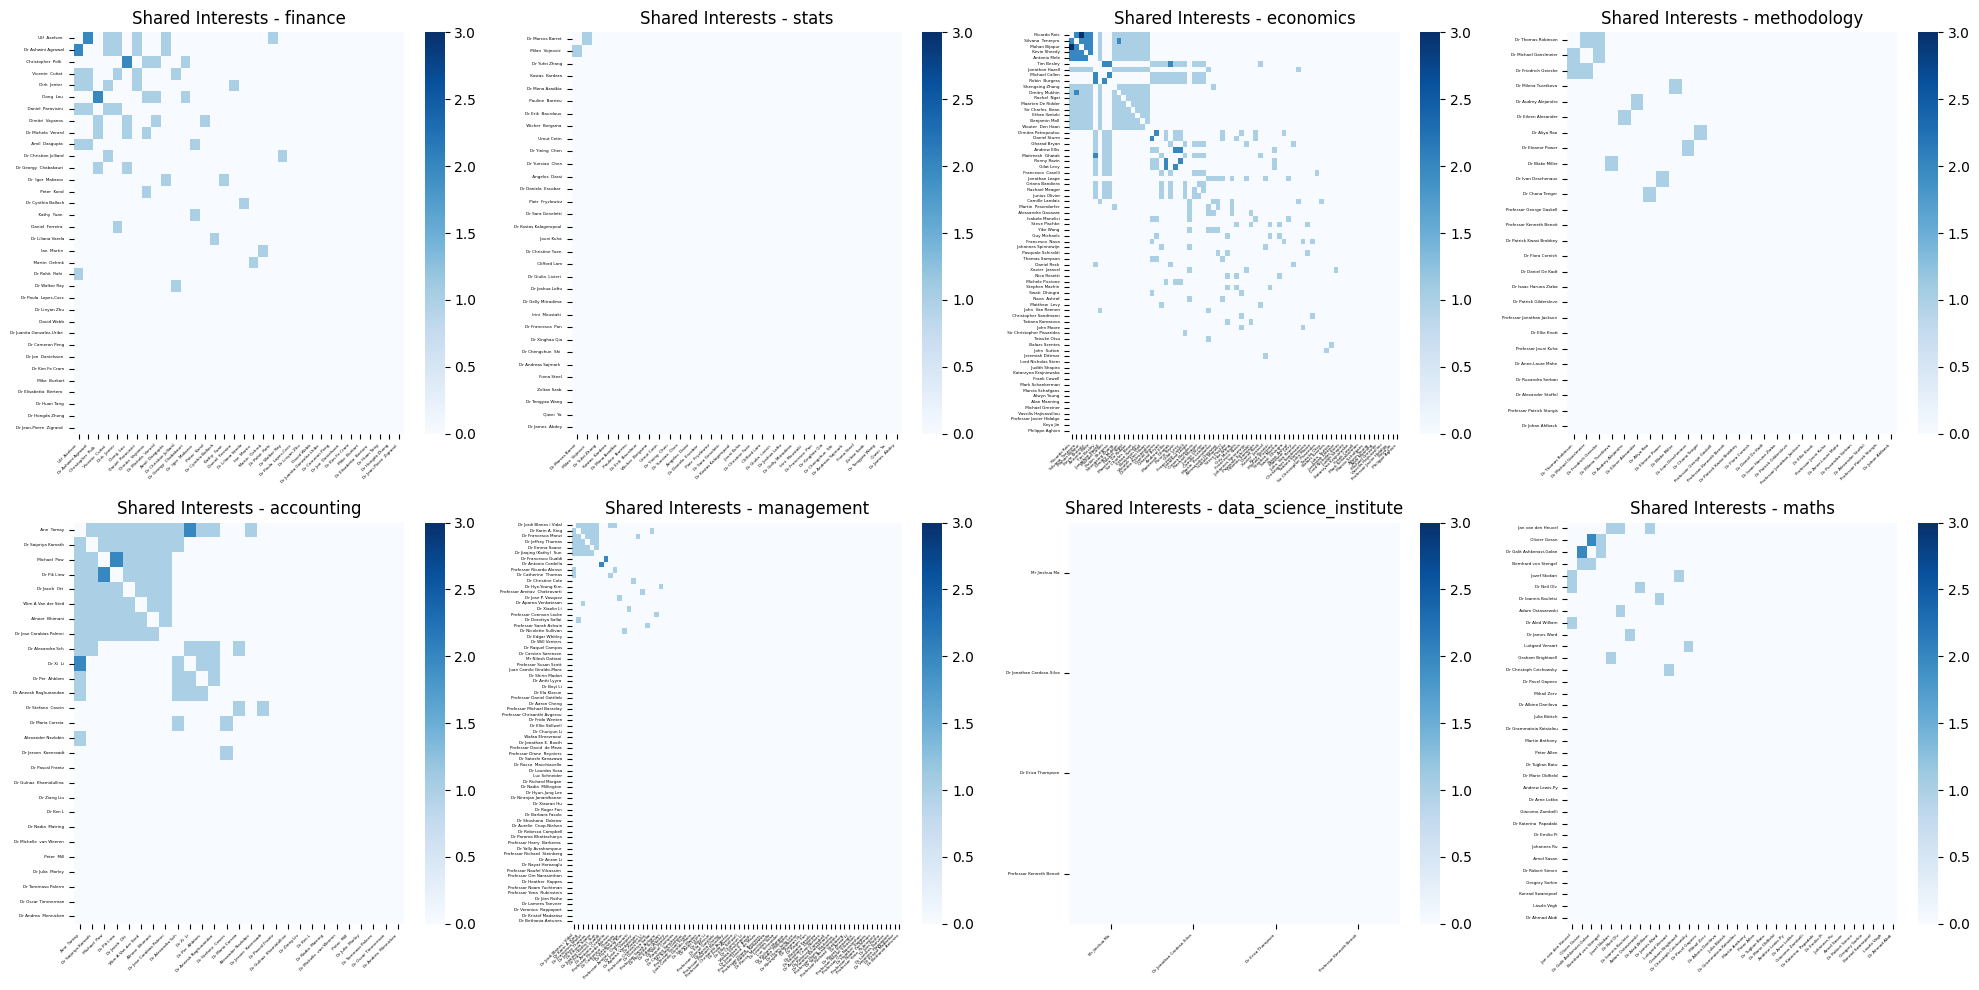

In [77]:
matrix_df = merged_df

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    department = deps[i]
    dep_matrix = matrix_df[matrix_df['department']==department]
    dep_matrix = dep_matrix[['Professor Name','Key Expertise']].copy()
    dep_matrix.loc[:, 'Key Expertise'] = dep_matrix['Key Expertise'].str.split(r',|;')

    professors = dep_matrix['Professor Name'].unique()
    n_professors = len(professors)

    # Initialize the matrix
    matrix = np.zeros((n_professors, n_professors))
    results_dict = {}

    for i in range(n_professors):
        for j in range(i+1, n_professors):
            interests_i = ','.join(dep_matrix[dep_matrix['Professor Name']==professors[i]]['Key Expertise'].iloc[0]).split(',')
            interests_j = ','.join(dep_matrix[dep_matrix['Professor Name']==professors[j]]['Key Expertise'].iloc[0]).split(',')
            shared_interests = set(interests_i).intersection(set(interests_j)) - {""}
            if shared_interests:
                pair = tuple(sorted([professors[i], professors[j]]))
                if pair not in results_dict:
                    results_dict[pair] = shared_interests
                else:
                    results_dict[pair] |= shared_interests

            n_common = len(shared_interests)
            matrix[i,j] = n_common
            matrix[j,i] = n_common

    connections = np.sum(matrix, axis=1)
    sorted_indices = np.argsort(connections)[::-1]
    professors_sorted = professors[sorted_indices]

    sns.heatmap(matrix[sorted_indices][:,sorted_indices], xticklabels=professors_sorted, yticklabels=professors_sorted, cmap='Blues', ax=ax, vmin=0, vmax=3)
    ax.set_xticklabels(professors_sorted, rotation=45, fontsize=3, ha='right')
    ax.set_yticklabels(professors_sorted, fontsize=3)
    ax.set_title(f'Shared Interests - {department}')


    final_df = pd.DataFrame(list(results_dict.items()), columns=['Professor Pair', 'Shared Interests'])
    final_df['Num Shared Interests'] = final_df['Shared Interests'].apply(len)
    final_df = final_df.sort_values(by='Num Shared Interests', ascending=False).reset_index(drop=True)

plt.tight_layout()
plt.show()

**These matrices show the level of shared interests between professors within each department. We see that only a minority of professors have common interests within each department.**

**Within the data science institute department, there are no academic staff have any of the same research expertise. It is worth clarifying that this department is very small with only 4 academic staff.**

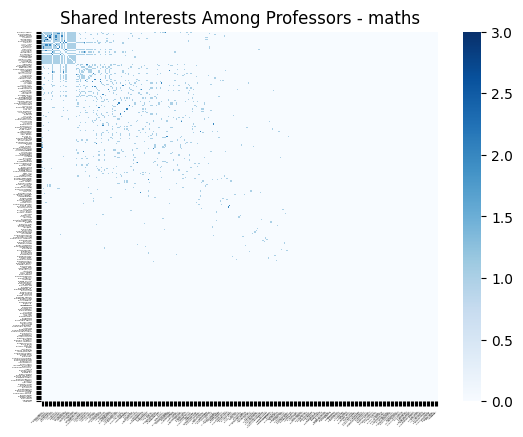

In [127]:
merged_df = merged_df.fillna("")

dep_matrix = merged_df 
dep_matrix = dep_matrix[['Professor Name','Key Expertise']].copy()
dep_matrix.loc[:, 'Key Expertise'] = dep_matrix['Key Expertise'].str.split(r',|;')


professors = dep_matrix['Professor Name'].unique()
n_professors = len(professors)

# Creating the matrix
matrix = np.zeros((n_professors, n_professors))
results_dict = {}

for i in range(n_professors):
    for j in range(i+1, n_professors):
        interests_i = set(x.strip() for x in dep_matrix[dep_matrix['Professor Name']==professors[i]]['Key Expertise'].iloc[0] if x.strip())
        interests_j = set(x.strip() for x in dep_matrix[dep_matrix['Professor Name']==professors[j]]['Key Expertise'].iloc[0] if x.strip())
        shared_interests = interests_i.intersection(interests_j)
        
        if shared_interests:
            pair = tuple(sorted([professors[i], professors[j]]))
            results_dict[pair] = shared_interests

            n_common = len(shared_interests)
            matrix[i,j] = n_common
            matrix[j,i] = n_common

# Sorting the pacdemic staff based on the number of connections
connections = np.sum(matrix, axis=1)
sorted_indices = np.argsort(connections)[::-1]
professors_sorted = professors[sorted_indices]

# here we visualization the matrix to show the connections
sns.heatmap(matrix[sorted_indices][:,sorted_indices], xticklabels=professors_sorted, yticklabels=professors_sorted, cmap='Blues')

plt.xticks(rotation=45, fontsize=1, ha='right')
plt.yticks(fontsize=1)
plt.title(f'Shared Interests Among Academic Staff Across All Departments')
plt.show()

### Showing the professors

In [130]:
final_df = pd.DataFrame(list(results_dict.items()), columns=['Academic Staff Pair', 'Shared Interests'])
final_df['Num Shared Interests'] = final_df['Shared Interests'].apply(len)
final_df = final_df.sort_values(by='Num Shared Interests', ascending=False).reset_index(drop=True)

staff_department = merged_df[['Professor Name', 'department']].set_index('Professor Name').to_dict()['department']
final_df['Departments'] = final_df['Academic Staff Pair'].apply(lambda x: [staff_department[x[0]], staff_department[x[1]]])

final_df[0:20]

,Academic Staff Pair,Shared Interests,Num Shared Interests,Departments
0,"( Mohan Bijapur, Ricardo Reis)","{monetary economics, financial economics, macr...",3,"[economics, economics]"
1,"( Ulf Axelson , Dr Ashwini Agrawal)","{corporate governance, corporate finance}",2,"[finance, finance]"
2,"( Antonio Mele, Kevin Sheedy)","{monetary economics, macroeconomics}",2,"[economics, economics]"
3,"( Ethan Ilzetzki, Dr Cynthia Balloch)","{macroeconomics, international finance}",2,"[economics, finance]"
4,"( Ricardo Reis, Silvana Tenreyro)","{monetary economics, macroeconomics}",2,"[economics, economics]"
5,"( Dmitry Mukhin, Silvana Tenreyro)","{macroeconomics, international economics}",2,"[economics, economics]"
6,"(Dr Antonio Cordella, Dr Francesco Gualdi)","{is infrastructures, e-government}",2,"[management, management]"
7,"(Dr Francesca Manzi, Professor Connson Locke)","{gender, leadership}",2,"[management, management]"
8,"( Kevin Sheedy, Silvana Tenreyro)","{monetary economics, macroeconomics}",2,"[economics, economics]"
9,"( Robin Burgess, Tim Besley)","{political economy, development economics}",2,"[economics, economics]"


This dataframe reveals which pair of academic staff have the most number of shared interest as well as which department they are from. The results suggest an intuitive picture which is that most people who share interests come from the same department.  

It is interesting to note that only one pair of academic staff from the economics department, Mohan Bijapur and Ricardo Reis, were found to have 3 common research interests.

### Q3: Which topics have the most diverse backgrounds of professors interested in it?

In [132]:
common_interest_df['Number of Departments'] = common_interest_df['Departments'].apply(lambda x: len(x))
diverse_topics = common_interest_df.sort_values('Number of Departments', ascending=False)[0:20][['Key Interest','Departments','Number of Professors','Professor Names','Number of Departments']].reset_index()
diverse_topics = diverse_topics.iloc[:,1:][0:5]
diverse_topics

,Key Interest,Departments,Number of Professors,Professor Names,Number of Departments
0,innovation,"[economics, methodology, finance, management, ...",15,"[ Ulf Axelson , Dr Juanita Gonzalez-Uribe , D...",5
1,econometrics,"[economics, maths, stats, finance]",16,"[ Vicente Cuñat , Dr Jon Danielsson , Dr Chr...",4
2,machine learning,"[maths, methodology, stats, data_science_insti...",8,"[Dr Marcos Barret, Dr Giulia Livieri , Milan...",4
3,risk management,"[maths, management, accounting, finance]",4,"[Dr Georgy Chabakauri , Michael Pow, Dr Emm...",4
4,economics of information,"[management, maths, finance]",3,"[Dr Ashwini Agrawal, Dr Yally Avrahampour, Ol...",3


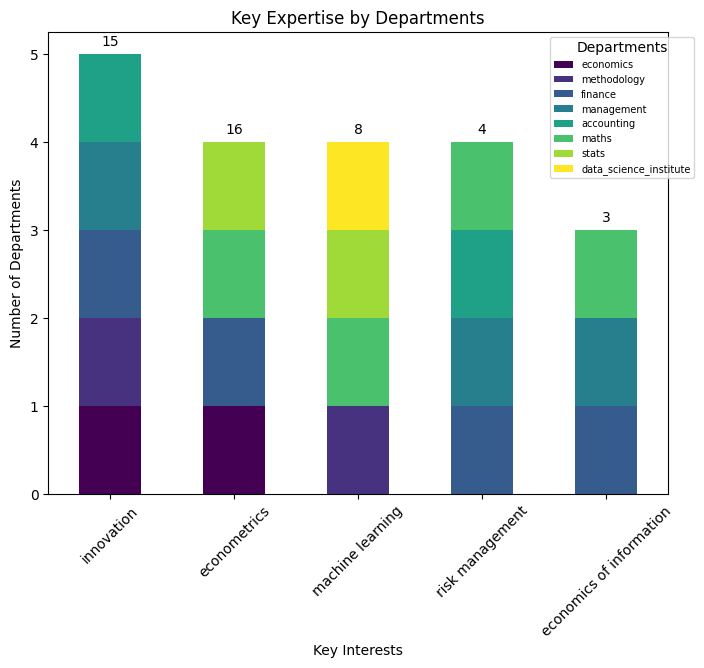

In [67]:
departments_df = pd.DataFrame()

for index, row in diverse_topics.iterrows():
    departments_dict = {}
    for department in row['Departments']:
        if department not in departments_dict:
            departments_dict[department] = 0
        departments_dict[department] += 1
    temp_df = pd.DataFrame(departments_dict, index=[index])
    departments_df = pd.concat([departments_df, temp_df], axis=0)

departments_df['Key Interest'] = diverse_topics['Key Interest']

departments_df.set_index('Key Interest', inplace=True)

departments_df = departments_df.fillna(0)

ax = departments_df.plot.bar(stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Key Expertise by Departments')
plt.xlabel('Key Interests')
plt.ylabel('Number of Departments')
plt.xticks(rotation=45)
plt.legend(title='Departments', fontsize=7, bbox_to_anchor=(1.05, 1))

# We do the annotating the bars in the plot
for i, (row, num_professors) in enumerate(zip(departments_df.values, diverse_topics['Number of Professors'])):
    bar_height = sum(row)
    plt.text(i, bar_height + 0.1, f'{num_professors}', ha='center')

plt.show()

This bar graph shows the top 5 topics with the most diverse set of departments who are interested in researching it. The number on top of each bar corresponds to the number of professors who hold it as a research interest / key expertise. Namely, these topics are 'innovation', 'econometrics', 'machine learning', 'risk management', and 'economics of information'.

For example, let us analyze the key expertise **'Innovation'**

In [36]:
diverse_topics.loc[0][1]

['economics', 'methodology', 'finance', 'management', 'accounting']

In [37]:
diverse_topics.loc[0][3]

[' Ulf  Axelson ',
 'Dr Juanita Gonzalez-Uribe ',
 'Dr Rohit  Rahi ',
 ' Xavier  Jaravel',
 ' Mark Schankerman',
 ' John  Van Reenen',
 'Dr Friedrich Geiecke',
 'Dr Saipriya Kamath',
 'Dr Boyi Li',
 'Professor Susan Scott',
 'Dr Carsten Sørensen',
 'Professor Om Narasimhan',
 'Dr Paroma Bhattacharya',
 'Dr Nadia  Millington',
 'Dr Lamees Tanveer']

These topics have the most diverse set of backgrounds (in terms of the department where a professor is stationed).  
The top topic is **'innovation'** which has 15 professors from 5 different departments (accounting, economics, methodology, management, and finance) who are interested in this topic. While a broad term, this area might indicate a potential interdisciplinary research collaboration between LSE academic staff.
Additionally, we also print out the names of the academic staff who might consider working together around this field.

**'Econometrics'**, **'machine learning'**, and **'risk management'** all have 4 different departments who hold them as fields of interest with varying number of staff.

The other fields/topics have 3 or less distinct departments interested in researching them but we can use this dataframe to identify potential collaboration projects based on the topic.

### Q4: Popular Topics

**Which topics are the most popular across all department (top 10)**

In [92]:
# Resetting the common_interest_df object
professors_with_common_interests = {}
merged_df = merged_df.fillna("")

for i in shared_term_counts_df:
    df_containing_interest = merged_df.loc[merged_df["Key Expertise"].str.contains(i)]
    professors_with_common_interests[i] = [df_containing_interest["Professor Name"].to_list(), df_containing_interest["department"].to_list()]

    # how many unique departments per interest
key_interest = professors_with_common_interests.keys()
departments = []
num_professors = []
professor_names = []
dep_count = []

for i in professors_with_common_interests:
    departments.append(set(professors_with_common_interests[i][1]))
    dep_count.append((professors_with_common_interests[i][1]))
    num_professors.append(len(professors_with_common_interests[i][0]))
    professor_names.append(professors_with_common_interests[i][0])                          

common_interest_df = pd.DataFrame(({'Key Interest': key_interest,'Departments': departments, 'Departments Count': dep_count,'Number of Professors': num_professors, 'Professor Names': professor_names})) 
common_interest_df['Departments'] = [list(depts) for depts in common_interest_df['Departments']]
common_interest_df.sort_values("Number of Professors", ascending=False).reset_index()[['Key Interest','Number of Professors']][0:10]

,Key Interest,Number of Professors
0,macroeconomics,24
1,econometrics,16
2,innovation,15
3,accounting,14
4,labour,14
5,development economics,13
6,political economy,12
7,asset pricing,11
8,economic theory,10
9,corporate finance,10


Here we have the 10 most popular key interests among all of the professors across the departments which are 'macroeconomics', 'econometrics',
 'innovation',
 'accounting',
 'labour',
 'development economics',
 'political economy',
 'asset pricing',
 'economic theory', and 
 'corporate finance'.

**Which topics are the most popular within each department (top 5)**

In [105]:
dfs = []

for i in range(len(deps)):
    merged_df = merged_df.fillna("")
    dep_matrix = merged_df 
    department = deps[i]
    dep_matrix = dep_matrix[dep_matrix['department']==department]
    dep_matrix = dep_matrix[['Professor Name','Key Expertise']]
    dep_matrix['Key Expertise'] = dep_matrix['Key Expertise'].str.split(r',|;')

    popular_topics = {}
    for topics in dep_matrix['Key Expertise']:
        for topic in topics:
            topic = topic.strip(" ")
            if topic == "":  # Skip if the topic is an empty string
                continue
            if topic not in popular_topics:
                popular_topics[topic] = 1
            else:
                popular_topics[topic] += 1              

    sorted_keys = sorted(popular_topics, key=popular_topics.get, reverse=True)
    sorted_dict = {k: popular_topics[k] for k in sorted_keys}

    dict_items = sorted_dict.items()
    df = pd.DataFrame(dict_items, columns=['key expertise', 'count'])
    df = df[0:5]
    df['department'] = department
    dfs.append(df)

final_df = pd.concat(dfs, axis=0, ignore_index=True)

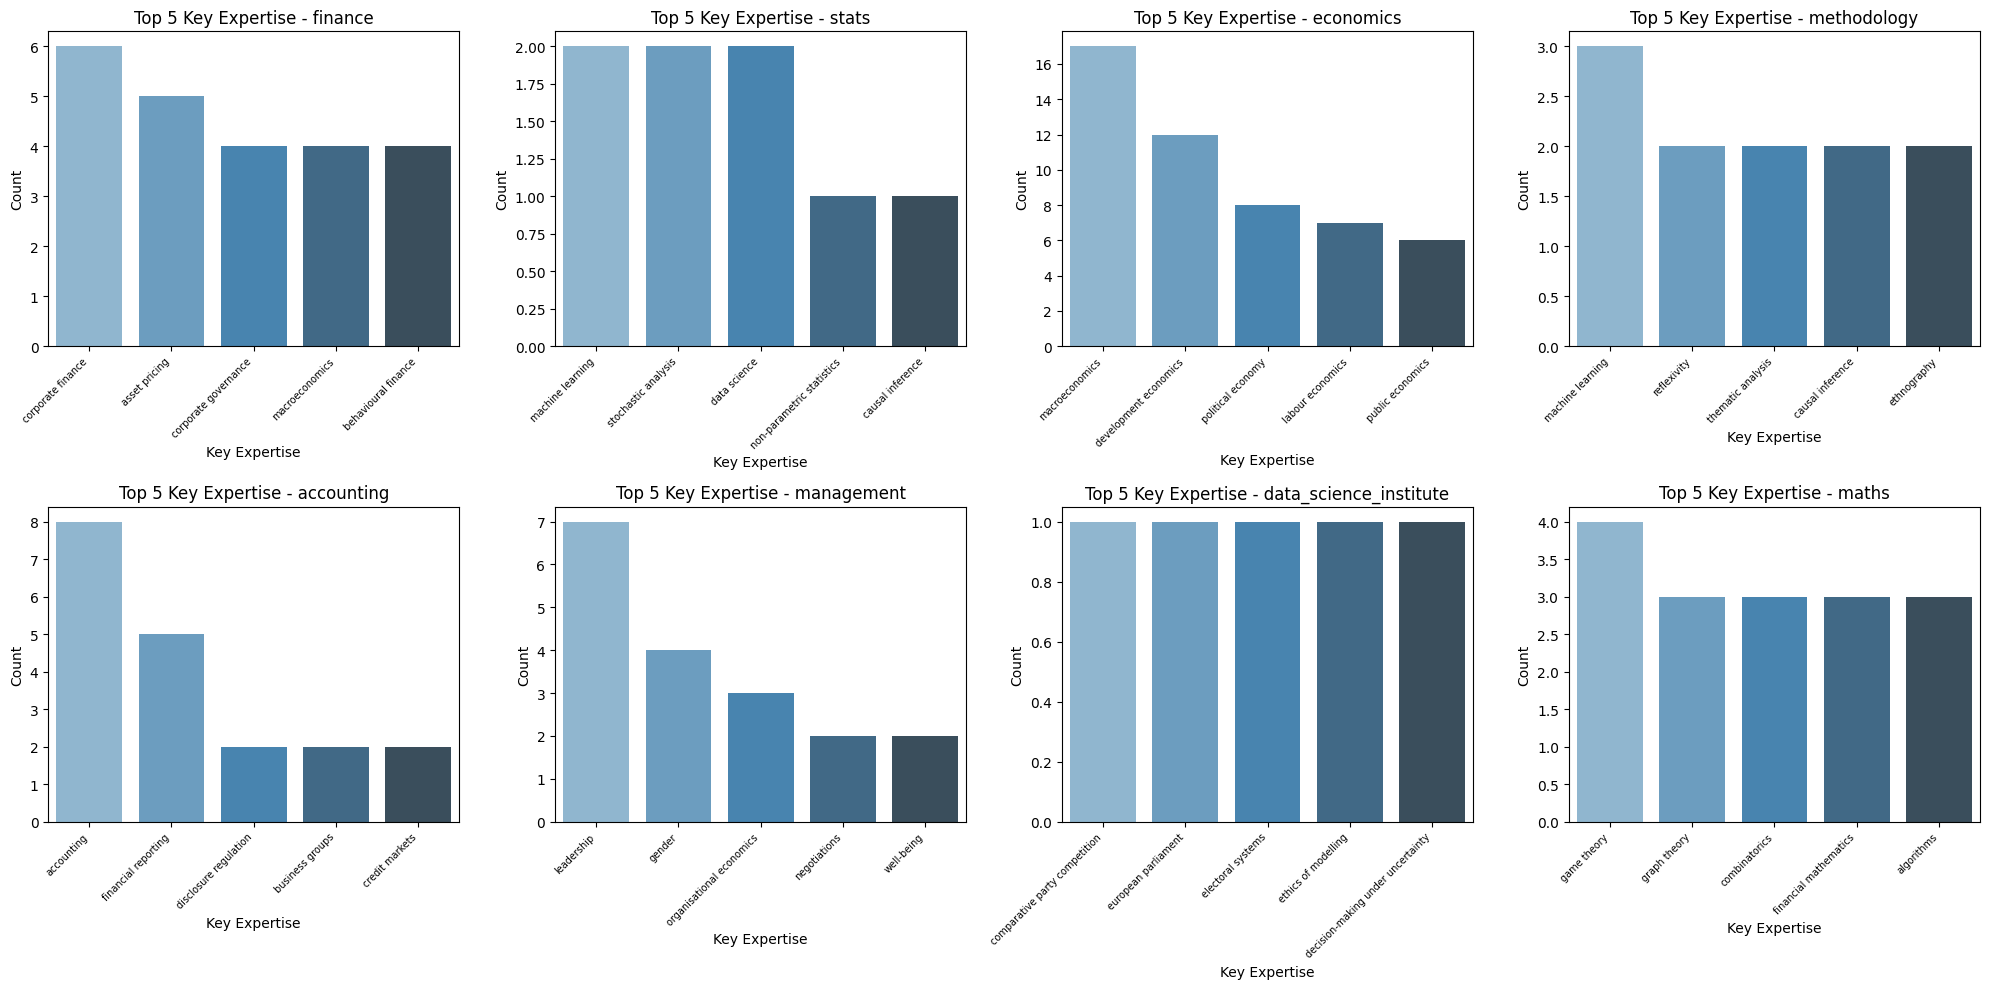

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    department = deps[i]
    dep_df = final_df[final_df['department'] == department].sort_values(by='count', ascending=False)
    
    sns.barplot(data=dep_df, x='key expertise', y='count', ax=ax, palette='Blues_d')
    ax.set_title(f'Top 5 Key Expertise - {department}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Key Expertise')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=7)

plt.tight_layout()
plt.show()

This set of bar graphs shows the top 5 research area or key expertise for each department. 
- For finance, the top 5 topics are 'corporate finance', 'asset pricing', 'corporate governance', 'macroeconomics', and 'behavioral finance'.
- For statistics, the most popular topics are 'machine learning', 'stochastic analysis', 'data science', 'non-parametric statistics', and 'causal inference'. However, the statistics department is missing a lot of entries so this may not be truly reflective of the department.
- For economics, the 5 most popular fields are 'macroeconomics','development economics', 'political economy','labor economics', and 'publc economics'.
- For methodology, the top 5 fields are 'machine learning', 'reflexivity', 'thematic analysis', 'causal inference', and 'ethnograpgy'.
- For management, 'leadership', 'gender', 'organizational economics', 'negotiations', and 'well-being' are the top 5 topics.
- For the DSI, this bar graph is less meaning because there are only 4 academic staff and each topic occurs only once.
- For mathematics, the most popular fields are 'game theory', 'graph theory', 'combinatorics', 'financial mathematics', and 'algorithms'.

# 5. Conclusion

### 5.1 Summary of Findings
- **RQ1** The economics and management departments have the highest pair of academic staff with the same research interests which may indicate a relatively higher level of potential interdisciplinary research collaboration.
- **RQ2** We identified the pair of staff with the most number of common interests (mostly 2 of the same topics). Mohan Bijapur and Ricardo Reis were the pair with the highest number of common interest at 3 topics.
- **RQ3** 'innovation', 'econometrics', 'machine learning', 'risk management', and 'economics of information' are the research topics / key expertise with the widest range of interested departments.
- **RQ4** We identified the most popular topic across our 8 departments which was 'macroeconomics', as well as the top 5  research interests in each department.

### 5.2 Limitations and Future Opportunities

- **Limited Number of Departments**

First of all, as mentioned, we only picked 8 departments to work with while there are 29 departments and institutes in total. If our process was applied to all the departments, a much bigger number of shared interest could be found and a more comprehensive and deeper analysis could be conducted. However, the selection of our departments was intentionally focused on the departments that dealth with more quantitative fields as we can expect these fields to generally have more commonality than between a quantitative department and a humanities or social science department.  
However, expanding the data collection to all departments may reveal cross-department common interests that might be surprising results. 

- **Alternative Methods of Matching Expertise/Interest/Topics** 

To analyze the level of shared research interests among academic staff, we checked the exact string matches of the “key expertise” variable. However, this is not the only way to measure shared interest across departments and academic staff. 

Alternative ways to measure shared interests could be applying some **Natural Language Processing** methods on the variables. Some example methods to modify the words into a more standardised form could be tokenisation, stemming and lemmatisation. Furthermore, more advanced techniques such as word embeddings could be applied. This method uses neural networds to capture the semantic relationship between the variables and classifies the texts according to those relationships. Topic modelling and k-means are other alternatives.
In this way, by forming topics not based on the exact strings but on the meaning behind the topics themselves, the analysis may be able to reflect shared interests between staff more accurately. For example, "ICT Infrastructure" and "ICT and Governance" are not identified as common interests in our analysis but they may be grouped together under the broader research field of 'ICT'. 

Depending on the scope of the categories that we want to analyze, a more sophisticated method that uses NLP for example, may prove more effective.

- **Including More Variables**

In some of the departments, there are a big amount of missing values for key expertise of professors because they were not available in their websites. This situation might have caused the answers to our research questions to be partly inaccurate. To further improve it, the “modules” variables could also be taken into account during the analysis. The relationships between the key expertise and the modules that the professor is teaching could be useful assuming that the professors should be interested and knowledgable about a topic that they are teaching. Another variable which would really help while identifying academic staffs’ research interests is their publications’ titles. 

Overall, although this project gave useful results, and has significant potential for development. 

### References
https://info.lse.ac.uk/Staff/Departments-and-Institutes/